# Scrape Instagram posts

### Bibliotheken importeren

In [3]:
import os 
import json
import pprint

import requests as r
import pandas as pd  
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

from instascrape import Profile, scrape_posts

In [4]:
#alt.renderers.enable('notebook'); # for rendering in jupyter notebook

## Zetten van de session id

In [5]:
AUTOMATISCH_SESSION_ID = True

if AUTOMATISCH_SESSION_ID:
    url = 'https://tajo-atelier.loophole.site/opstartinfo.txt'
    my_session_id = r.get(url).text       

## Enkele technische details voor de browser meegeven aan onze computer

In [6]:
headers = {
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Mobile Safari/537.36 Edg/87.0.664.57",
    "cookie": f"sessionid={my_session_id};"
}

## Onze instagram dataset creëren.
We willen graag kijken op welk moment Billie Eilish haar posts het goed doen.

In [29]:
billie = Profile('billieeilish')
billie.scrape(headers=headers)

In [30]:
billie_recent_posts = billie.get_recent_posts()
billie_recent_posts = billie.get_recent_posts()
billie_recent_posts

[<Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>]

In [31]:
print(billie)

<Profile>


In [32]:
billie_json = billie.json_dict

In [33]:
pprint.pprint(billie_json)

{'browser_push_pub_key': 'BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjFNkuTq9j4MPAVLvAFhXrUU1A9UxyxBA7YIOjqDIDHI',
 'bundle_variant': 'es6',
 'cache_schema_version': 3,
 'config': {'csrf_token': 'GTOR1FxytF1ieM433YcNO0BH5SgdLZZF',
            'viewer': {'badge_count': '{"seq_id": 21583, "badge_count": 7, '
                                      '"badge_count_at_ms": 1620107529296}',
                       'biography': '||9000||',
                       'category_name': None,
                       'external_url': None,
                       'fbid': '17841400012609211',
                       'full_name': 'Lise',
                       'has_phone_number': True,
                       'has_profile_pic': True,
                       'has_tabbed_inbox': False,
                       'id': '589504420',
                       'is_joined_recently': False,
                       'is_private': True,
                       'is_professional_account': False,
                       'profile_pic_ur

                                                                                                                                             '    '
                                                                                                                                             '<BaseURL>https://scontent-bru2-1.cdninstagram.com/v/t50.16885-16/72375164_132130464802333_4701679549429700211_n.mp4?_nc_ht=scontent-bru2-1.cdninstagram.com&amp;_nc_cat=101&amp;_nc_ohc=AchcOLa29OIAX_ApuKl&amp;edm=ABfd0MgBAAAA&amp;ccb=7-4&amp;oh=e1e487c772221ee9bc01fad0e0afe382&amp;oe=60932EAC&amp;_nc_sid=7bff83</BaseURL>\n'
                                                                                                                                             '    '
                                                                                                                                             '<SegmentBase '
                                                                                

                                                                                                                                             'subsegmentStartsWithSAP="1"><Representation '
                                                                                                                                             'id="18012802711141747ad" '
                                                                                                                                             'mimeType="audio/mp4" '
                                                                                                                                             'codecs="mp4a.40.2" '
                                                                                                                                             'audioSamplingRate="44100" '
                                                                                                                                             'sta

                                                                                                                                                                 'inspire '
                                                                                                                                                                 'change. '
                                                                                                                                                                 'try '
                                                                                                                                                                 'not '
                                                                                                                                                                 'to '
                                                                                                                                                         

           '48': True,
           '49': True,
           '50': True},
 'language_code': 'en',
 'locale': 'en_US',
 'mid_pct': 79.99351,
 'nonce': 'GnvHbQRUAXheZP1/OqoQ7g==',
 'platform': 'android',
 'rollout_hash': '5916bd277576',
 'server_checks': {'hfe': True},
 'signal_collection_config': {'bbs': 100,
                              'ctw': None,
                              'dbs': 100,
                              'fd': 60,
                              'hbc': {'hbbi': 30,
                                      'hbcbc': 2,
                                      'hbi': 60,
                                      'hbv': '012414760802b3c879b3a7eccec9aa01',
                                      'hbvbc': 0},
                              'i': 60,
                              'rt': 1024,
                              'sbs': 1,
                              'sc': {'c': [[30000, 838801],
                                           [30001, 838801],
                                           [300

In [34]:
posts_df = pd.DataFrame(post.to_dict() for post in billie_recent_posts)
posts_df[['id','display_url','upload_date', 'comments', 'likes']]

,id,display_url,upload_date,comments,likes
0,2564835548188822496,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 18:17:25,99446,14759523
1,2564831960767039259,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 18:10:17,66786,13429185
2,2564829485775200661,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 18:05:22,237527,20186549
3,2564826972195958000,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 18:00:22,105436,15199532
4,2562653690045789912,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-29 18:02:49,47934,6029804
5,2561927465392379420,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-28 18:00:19,41257,4658541
6,2561361820029044495,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-27 23:15:44,22841,5527489
7,2561178371339067345,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-27 17:11:15,129606,13794440
8,2560477493903888783,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-26 18:00:10,99412,9023281
9,2555659471063206422,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-20 02:26:11,136831,15643393


In [38]:
posts_df = pd.DataFrame(post.to_dict() for post in billie_recent_posts)
posts_df[['id','display_url','upload_date', 'comments', 'likes']]

posts_df['uur_van_de_dag'] = posts_df.upload_date.map(lambda dt: dt.hour)
posts_df[['id','display_url','upload_date', 'uur_van_de_dag', 'comments', 'likes']]

,id,display_url,upload_date,uur_van_de_dag,comments,likes
0,2564835548188822496,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 18:17:25,18,99446,14759523
1,2564831960767039259,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 18:10:17,18,66786,13429185
2,2564829485775200661,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 18:05:22,18,237527,20186549
3,2564826972195958000,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 18:00:22,18,105436,15199532
4,2562653690045789912,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-29 18:02:49,18,47934,6029804
5,2561927465392379420,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-28 18:00:19,18,41257,4658541
6,2561361820029044495,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-27 23:15:44,23,22841,5527489
7,2561178371339067345,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-27 17:11:15,17,129606,13794440
8,2560477493903888783,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-26 18:00:10,18,99412,9023281
9,2555659471063206422,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-20 02:26:11,2,136831,15643393


In [39]:
df_billie_posts_grouped = posts_df.groupby('uur_van_de_dag').mean().reset_index()

In [40]:
df_billie_posts_grouped[['uur_van_de_dag','likes']]

,uur_van_de_dag,likes
0,1,1.043419e+07
1,2,1.564339e+07
2,17,1.379444e+07
3,18,1.189806e+07
4,22,1.101779e+07
5,23,5.527489e+06


Text(0.5, 1.0, 'Billies likes per uur van de dag')

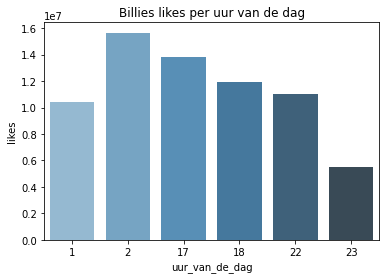

In [42]:
plot = sns.barplot(
    data=df_billie_posts_grouped,
    x='uur_van_de_dag',
    y='likes',
    palette='Blues_d')

plot.set_title('Billies likes per uur van de dag')

In [43]:
onbespreekbaar = Profile('onbespreekbaar')
onbespreekbaar.scrape(headers=headers)
onbespreekbaar_posts = onbespreekbaar.get_recent_posts()
onbespreekbaar_posts = onbespreekbaar.get_recent_posts()

df_onbespreekbaar_posts = pd.DataFrame(post.to_dict() for post in onbespreekbaar_posts)
df_onbespreekbaar_posts['uur_van_de_dag'] = df_onbespreekbaar_posts.upload_date.map(lambda dt: dt.hour)
df_onbespreekbaar_posts[['id','display_url','upload_date', 'uur_van_de_dag', 'comments', 'likes']]

df_onbespreekbaar_posts_grouped = df_onbespreekbaar_posts.groupby('uur_van_de_dag').mean().reset_index()

/Users/lisekerckhove/.pyenv/versions/3.7.4/lib/python3.7/site-packages/instascrape/core/_static_scraper.py:136: MissingCookiesWarning: Request header does not contain cookies! It's recommended you pass at least a valid sessionid otherwise Instagram will likely redirect you to their login page.
  MissingCookiesWarning


In [44]:
df_onbespreekbaar_posts_grouped[['uur_van_de_dag','likes']]

,uur_van_de_dag,likes
0,11,3886.666667
1,12,3493.000000
2,16,690.000000
3,18,1224.000000
4,19,1582.000000


Text(0.5, 1.0, 'post op den dag')

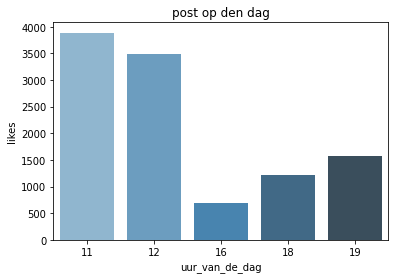

In [45]:
plot = sns.barplot(
    data=df_onbespreekbaar_posts_grouped,
    x='uur_van_de_dag',
    y='likes',
    palette='Blues_d')

plot.set_title('Billies likes per uur van de dag')

## Nu is het aan jullie

Vul jullie persoon van interesse in waar er <persoon> staat en kijk of je kan zien wanneer deze persoon  
het meeste likes haalt en of je daar een link in kan zien.